In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
train_data = pd.read_csv("type1_train.csv")
valid_data = pd.read_csv("type1_valid.csv")
test_data = pd.read_csv("type1_test.csv")

In [21]:
train_data = pd.read_csv("type2_train.csv")
valid_data = pd.read_csv("type2_valid.csv")
test_data = pd.read_csv("type2_test.csv")

In [22]:
categorical = ['Sex','HTN','DM']

In [23]:
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(train_data[feature])
    train_data[feature] = le.transform(train_data[feature])
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(valid_data[feature])
    valid_data[feature] = le.transform(valid_data[feature])

for feature in categorical:
    le = LabelEncoder()
    le = le.fit(test_data[feature])
    test_data[feature] = le.transform(test_data[feature])

In [24]:
man_train = train_data[train_data['Sex'] == 1]
woman_train = train_data[train_data['Sex'] == 0]

man_valid = valid_data[valid_data['Sex'] == 1]
woman_valid = valid_data[valid_data['Sex'] == 0]

man_test = test_data[test_data['Sex'] == 1]
woman_test = test_data[test_data['Sex'] == 0]

In [25]:
x_train = train_data.drop(['CarotidUS'], axis=1)
y_train = train_data['CarotidUS']
x_valid = valid_data.drop(['CarotidUS'], axis=1)
y_valid = valid_data['CarotidUS']
x_test = test_data.drop(['CarotidUS'], axis=1)
y_test = test_data['CarotidUS']

In [33]:
x_train = man_train.drop(['CarotidUS'], axis=1)
y_train = man_train['CarotidUS']
x_valid = man_valid.drop(['CarotidUS'], axis=1)
y_valid = man_valid['CarotidUS']
x_test = man_test.drop(['CarotidUS'], axis=1)
y_test = man_test['CarotidUS']

In [8]:
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

In [34]:
best_acc = 0
best_params = {}
for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        for min_samples_leaf in params['min_samples_leaf']:
            rf_clf = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=7)
            rf_clf.fit(x_train, y_train)
            pred = rf_clf.predict(x_valid)
            print('max_depth: {0}, min_samples_split: {1}, min_samples_leaf: {2}'.format(max_depth, min_samples_split, min_samples_leaf))
            print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_valid, pred), precision_score(y_valid, pred), recall_score(y_valid, pred), f1_score(y_valid, pred)))

            if accuracy_score(y_valid, pred) > best_acc:
                best_acc = accuracy_score(y_valid, pred)
                best_params['max_depth'] = max_depth
                best_params['min_samples_split'] = min_samples_split
                best_params['min_samples_leaf'] = min_samples_leaf

print('best params: {0}'.format(best_params))
print('best accuracy: {0:.4f}'.format(best_acc))
rf_clf = RandomForestClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'], max_features=7)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

max_depth: 2, min_samples_split: 2, min_samples_leaf: 1
accuracy: 0.6917, precision: 0.6416, recall: 0.4879, f1: 0.5543
max_depth: 2, min_samples_split: 2, min_samples_leaf: 5
accuracy: 0.6865, precision: 0.5954, recall: 0.6308, f1: 0.6126
max_depth: 2, min_samples_split: 2, min_samples_leaf: 8
accuracy: 0.6848, precision: 0.6114, recall: 0.5429, f1: 0.5751
max_depth: 2, min_samples_split: 3, min_samples_leaf: 1
accuracy: 0.6900, precision: 0.6356, recall: 0.4945, f1: 0.5562
max_depth: 2, min_samples_split: 3, min_samples_leaf: 5
accuracy: 0.6917, precision: 0.6561, recall: 0.4527, f1: 0.5358
max_depth: 2, min_samples_split: 3, min_samples_leaf: 8
accuracy: 0.6883, precision: 0.6599, recall: 0.4264, f1: 0.5180
max_depth: 2, min_samples_split: 5, min_samples_leaf: 1
accuracy: 0.6917, precision: 0.6283, recall: 0.5275, f1: 0.5735
max_depth: 2, min_samples_split: 5, min_samples_leaf: 5
accuracy: 0.6908, precision: 0.6286, recall: 0.5209, f1: 0.5697
max_depth: 2, min_samples_split: 5, min_

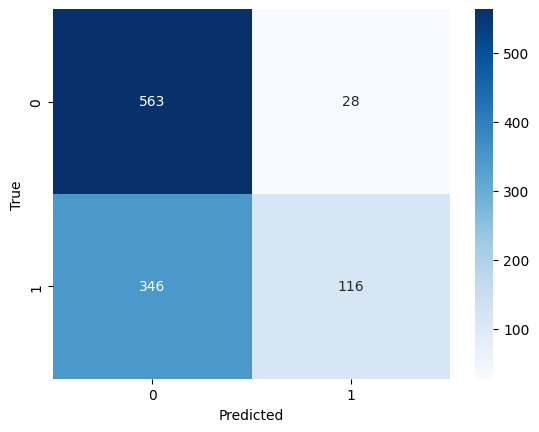

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Feature Importances:
[0.43303648 0.         0.00515803 0.00568505 0.03150298 0.036997
 0.04141376 0.03691384 0.04069658 0.04011412 0.04482628 0.05090851
 0.03677999 0.03963064 0.03193815 0.0426767  0.03934604 0.04237584]

Age: 0.433
Sex: 0.000
HTN: 0.005
DM: 0.006
HDL: 0.032
LDL: 0.037
Triglyceride: 0.041
Cholesterol: 0.037
HOMA: 0.041
Insulin: 0.040
Ferritin: 0.045
HbA1C: 0.051
ESR: 0.037
Homocysteine: 0.040
Apolipoprotein A: 0.032
Apolipoprotein B: 0.043
Lp(a): 0.039
HS-CRP: 0.042
[0.43303648 0.         0.00515803 0.00568505 0.03150298 0.036997
 0.04141376 0.03691384 0.04069658 0.04011412 0.04482628 0.05090851
 0.03677999 0.03963064 0.03193815 0.0426767  0.03934604 0.04237584]


<Axes: ylabel='Feature'>

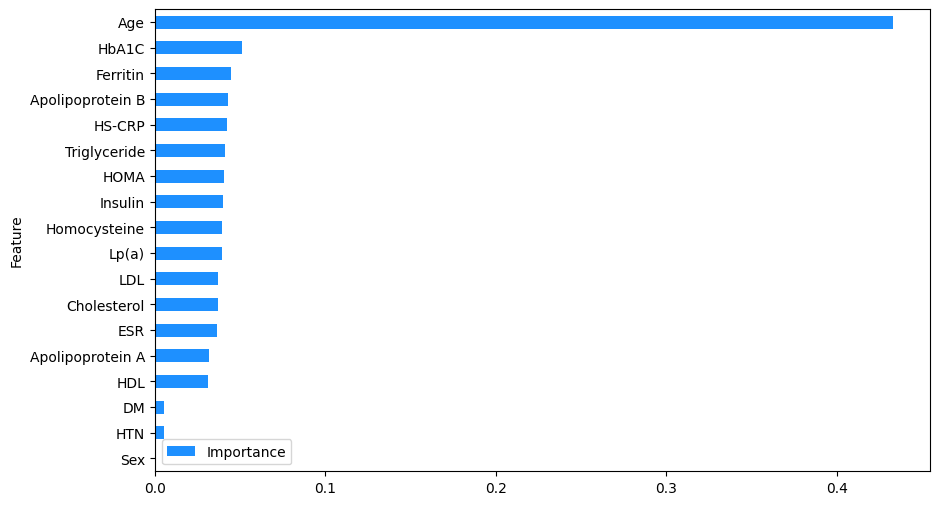

In [35]:
feature = x_test.columns.tolist()
print("Feature Importances:\n{0}\n".format(rf_clf.feature_importances_))
for name, value in zip(train_data.columns, rf_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
print(rf_clf.feature_importances_)
feature_importance = pd.DataFrame({'Feature':feature,'Importance':rf_clf.feature_importances_})
feature_importance.sort_values(by=['Importance'], ascending=True, inplace=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='dodgerblue')